## scikit-learn 특징

* 다양한 머신러닝 알고리즘을 구현한 파이썬 라이브러리
* 심플하고 일관성 있는 API, 유용한 온라인 문서, 풍부한 예제
* 머신러닝을 위한 쉽고 효율적인 개발 라이브러리 제공
* 다양한 머신러닝 관련 알고리즘과 개발을 위한 프레임워크와 API 제공
* 많은 사람들이 사용하며 다양한 환경에서 검증된 라이브러리
* 머신러닝의 프로세스는 1) 데이터 가공/변환 -> 모델 학습/예측 -> 평가

## scikit-learn 주요 모듈

| 모듈 | 설명 |
|:------|:------|
| `sklearn.datasets` | 내장된 예제 데이터 세트 |
| `sklearn.preprocessing` | 다양한 데이터 전처리 기능 제공 (변환, 정규화, 스케일링 등) |
| `sklearn.feature_selection` | 특징(feature)를 선택할 수 있는 기능 제공 | 
| `sklearn.feature_extraction` | 특징(feature) 추출에 사용 |
| `sklearn.decomposition` | 차원 축소 관련 알고리즘 지원 (PCA, NMF, Truncated SVD 등)
| `sklearn.model_selection` | 교차 검증을 위해 데이터를 학습/테스트용으로 분리, 최적 파라미터를 추출하는 API 제공 (GridSearch 등)
| `sklearn.metrics` | 분류, 회귀, 클러스터링, Pairwise에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall, ROC-AUC, RMSE 등) |
| `sklearn.pipeline` | 특징 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 묶어서 실행할 수 있는 유틸리티 제공 |
| `sklearn.linear_model` | 선형 회귀, 릿지(Ridge), 라쏘(Lasso), 로지스틱 회귀 등 회귀 관련 알고리즘과 SGD(Stochastic Gradient Descent) 알고리즘 제공 |
| `sklearn.svm` | 서포트 벡터 머신 알고리즘 제공 |
| `sklearn.neighbors` | 최근접 이웃 알고리즘 제공 (k-NN 등)
| `sklearn.naive_bayes` | 나이브 베이즈 알고리즘 제공 (가우시안 NB, 다항 분포 NB 등) |
| `sklearn.tree` | 의사 결정 트리 알고리즘 제공 |
| `sklearn.ensemble` | 앙상블 알고리즘 제공 (Random Forest, AdaBoost, GradientBoost 등) |
| `sklearn.cluster` | 비지도 클러스터링 알고리즘 제공 (k-Means, 계층형 클러스터링, DBSCAN 등)

## `estimator` API

* 일관성: 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 인터페이스 공유
* 검사(inspection): 모든 지정된 파라미터 값은 공개 속성으로 노출
* 제한된 객체 계층 구조
  + 알고리즘만 파이썬 클래스에 의해 표현
  + 데이터 세트는 표준 포맷(NumPy 배열, Pandas DataFrame, Scipy 희소 행렬)으로 표현
  + 매개변수명은 표준 파이썬 문자열 사용
* 구성: 많은 머신러닝 작업은 기본 알고리즘의 시퀀스로 나타낼 수 있으며, Scikit-Learn은 가능한 곳이라면 어디서든 이 방식을 사용
* 합리적인 기본값: 모델이 사용자 지정 파라미터를 필요로 할 때 라이브러리가 적절한 기본값을 정의

### API 사용 방법

1. Scikit-Learn으로부터 적절한 `estimator` 클래스를 임포트해서 모델의 클래스 선택
2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
3. 학습 데이터나 테스트 데이터 준비
4. 모델 인스턴스의 `fit()` 메서드를 호출해 모델을 데이터에 적합
5. 모델을 새 데이터에 대해서 적용
  + 지도 학습: 대체로 `predict()` 메서드를 사용해 알려지지 않은 데이터에 대한 레이블 예측
  + 비지도 학습: 대체로 `transform()`이나 `predict()` 메서드를 사용해 데이터의 속성을 변환하거나 추론
6. 필요에 따라 정밀도 등을 시각화

### 예제

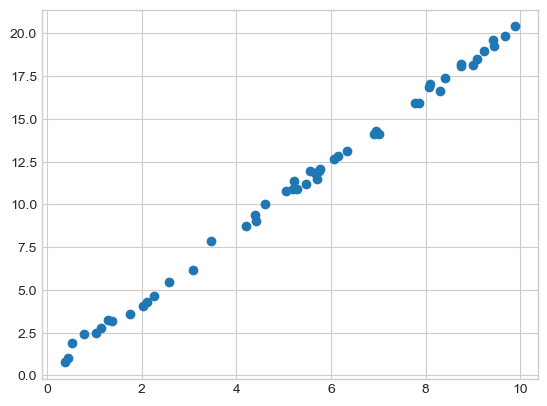

<Figure size 300x200 with 0 Axes>

In [169]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)
plt.scatter(x,y);
plt.figure(figsize=(3,2))
plt.show()

### 1. 적절한 `estimator` 클래스를 임포트해서 모델의 클래스 선택, 적절한 라이브러리 임포트

* from sklearn적절한 모듈 import 클래스
* from sklearn.model_selection import train_test_split

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [107]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])


### 2. 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택

* LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) >> 하이퍼 파라미트들의 디폴트 값들, 생략하면 자동 지정
* 하이퍼 파라미터 = 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터를 통칭하며, 머신러닝 알고리즘의 성능을 튜닝할 수 있음
* copy_X = 입력데이터를 복사를 하고 사용하느냐 마느냐
* fit_intercept=True 상수형태의 값이냐 아니냐
* n_jobs=None 모델을 돌릴 때 여러 코어를 이용해서 돌릴 수 있음
* normalize = False 정규화가 되어있느냐 안되어 있느냐



In [125]:
model = LinearRegression(fit_intercept=True) # 여기서 LinearRegression()의 괄호 안에 하이퍼파라미터 지정가능
# 모델의 클래스를 인스턴스화
model


LinearRegression()

### 3. 학습 데이터나 테스트 데이터 준비

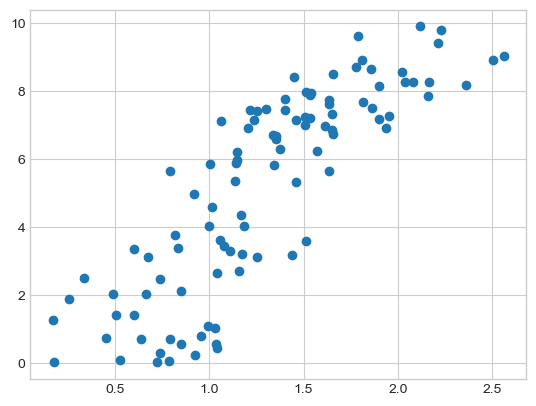

In [173]:
noise = np.random.rand(100,1)
# 여기서 rand에 (100,1)로 열로 변환시킨 이유는 feature라서 (열) 이라서 
X = sorted(1.721 * np.random.rand(100,1)) + noise #여기서는 열이 하나로 feature가 하나이지만 실제로는 여러개 그래서 features 대문자X를 쓰는것
y = sorted(10 * np.random.rand(100))
plt.scatter(X,y);

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#>> (피처 데이터 세트 즉 피쳐스 , 레이블 데이터 세트(값) , 테스트 데이터 세트 비율, 호출할 때 마다의 난수 발생 값)
# ex) 만약 random_state 지정안하면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다

### 4. 모델 인스턴스의 `fit()` 메서드를 호출해 모델을 데이터에 적합 (학습 진행)

In [159]:
model.fit(X, y)

LinearRegression()

### 4-1) 모델에서 return시켜주는 하이퍼 파라미터 값이 있음
model.xx_

In [165]:
model.coef_
model.intercept_

-0.8670256711443463

### 5. 모델을 새 데이터에 대해서 적용


In [166]:
xfit = np.linspace(-1,4) #새로운 데이터를 linspace를 통해 하나 만들고
Xfit = xfit[:, np.newaxis] #Xfit 로 특정 벡터를 만들어주고
yfit = model.predict(Xfit) #그것으로 predict를 통해 예측한 결과를 yfit에 저장


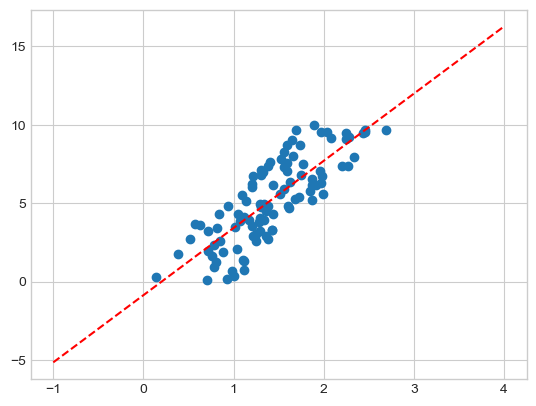

In [168]:
plt.scatter(X,y)
plt.plot(xfit, yfit, '--r');

## 예제 데이터 세트

### 1) 분류 또는 회귀용 데이터 세트

* datasets.load_블라블라 로 다운로드 한 후 가져옴

| API | 설명 |
|:-----|:------|
| `datasets.load_boston()` | 미국 보스턴의 집에 대한 특징과 가격 데이터 (회귀용) |
| `datasets.load_breast_cancer()` | 위스콘신 유방암 특징들과 악성/음성 레이블 데이터 (분류용) |
| `datasets.load_diabetes()` | 당뇨 데이터 (회귀용) |
| `datasets.load_digits()` | 0에서 9까지 숫자 이미지 픽셀 데이터 (분류용) |
| `datasets.load_iris()` | 붓꽃에 대한 특징을 가진 데이터 (분류용) |



### 2) 온라인 데이터 세트

* 데이터 크기가 커서 온라인에서 데이터를 다운로드 한 후에 불러오는 예제 데이터 세트
* fetch_블라블라 로 다운로드 한 후 가져옴

| API | 설명 |
|:-----|:------|
| `fetch_california_housing()` | 캘리포니아 주택 가격 데이터 |
| `fetch_covtype()` | 회귀 분석용 토지 조사 데이터 |
| `fetch_20newsgroups()` | 뉴스 그룹 텍스트 데이터 |
| `fetch_olivetti_faces()` | 얼굴 이미지 데이터 |
| `fetch_lfw_people()` | 얼굴 이미지 데이터 |
| `fetch_lfw_paris()` | 얼굴 이미지 데이터 |
| `fetch_rcv1()` | 로이터 뉴스 말뭉치 데이터 |
| `fetch_mldata()` | ML 웹사이트에서 다운로드 |



### 3) 분류와 클러스터링을 위한 표본 데이터 생성

| API | 설명 |
|:-----|:------|
| `datasets.make_classifications()` | 분류를 위한 데이터 세트 생성. 높은 상관도, 불필요한 속성 등의 노이즈를 고려한 데이터를 무작위로 생성 |
| `datasets.make_blobs()` | 클러스터링을 위한 데이터 세트 생성. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 셋트를 무작위로 생성 |

### 예제 데이터 세트 구조

* 일반적으로 딕셔너리 형태로 구성
* data: 특징 데이터 세트
* target: 분류용은 레이블 값, 회귀용은 숫자 결과값 데이터
* target_names: 개별 레이블의 이름 (분류용)
* feature_names: 특징 이름
* DESCR: 데이터 세트에 대한 설명과 각 특징 설명

In [221]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
print(diabetes.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [34]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [35]:
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [36]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [37]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [39]:
print(diabetes.data_filename)
print(diabetes.target_filename)

diabetes_data.csv.gz
diabetes_target.csv.gz


# `model_selection` 모듈

* 학습용 데이터와 테스트 데이터로 분리
* 교차 검증 분할 및 평가
* Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수와 클래스 제공

### 1) `train_test_split()`: 학습/테스트 데이터 세트 분리

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
#features라서 여러 개의 feature이 포함되어 있기 때문에 대문자 X로 표현함
# matrix 형태로 표현할때는 대문자, 하나의 벡터로만 구성이 되어있으면 소문자
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3) #트레인 데이타 70% 테스트 데이타 30%

model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


* train_test_split에서 
* X_train, X_test 는 features를 여러개 담고 있는 2차원 배열이다
* y_train, y_test 는 target 이다

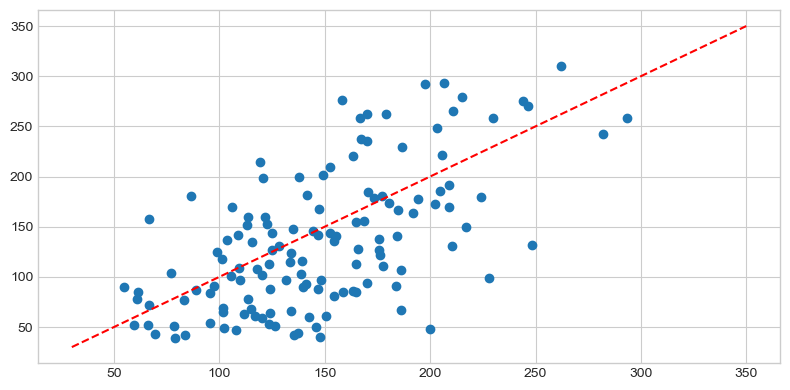

In [60]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8,4))
plt.scatter(predicted,expected)
plt.plot([30,350], [30,350], '--r')
plt.tight_layout()

### 2) `cross_val_score()`: 교차 검증

In [63]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(model,diabetes.data, diabetes.target, cv=5) #cv는 cross validation을 위해 몇 개로 나눠줄지

print("교차 검증 정확도: {}".format(scores))
print("교차 검증 정확도: {} +/- {}".format(np.mean(scores), np.std(scores)))


교차 검증 정확도: [0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차 검증 정확도: 0.4823181221114939 +/- 0.04926619776563216


### 3) `GridSearchCV`: 교차 검증과 최적 하이퍼 파라미터 찾기

* 훈련 단계에서 학습한 파라미터에 영향을 받아서 최상의 파라미터를 찾는 일은 항상 어려운 문제
* 다양한 모델의 훈련 과정을 자동화하고, 교차 검사를 사용해 최적 값을 제공하는 도구 필요
* 교차 검증을 여러 번 반복해서(훈련의 자동화) 최적의 하이퍼 파라미터를 찾는 것
* 데이터가 적을 때 유용

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001, 0.01, 0.1, 1, 10 ,100, 1000] #알파의 값마다 파라미터로 넣고 돌림, 현재 값이 7개니깐 7번 반복이 됨
param_grid = dict(alpha=alpha) #신기하당

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print(f'최적 점수: {result.best_score_}')
print(f'최적 파라미터: {result.best_params_}')
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수: 0.4633240541517594
최적 파라미터: {'alpha': 0.1}
Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001040,0.000257,0.000429,0.000454,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,3
1,0.000697,0.000457,0.000391,0.000479,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,2
2,0.000957,0.000115,0.000038,0.000115,0.1,{'alpha': 0.1},0.526550,0.244987,0.383530,0.606594,0.286094,0.618033,0.431230,0.441788,0.431968,0.662466,0.463324,0.132681,1
3,0.000702,0.000459,0.000548,0.000467,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,4
4,0.000831,0.000419,0.000401,0.000491,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,5
5,0.000785,0.000397,0.000404,0.000495,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000847,0.000435,0.000413,0.000461,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


In [177]:
import multiprocessing #multiprocessing이란 복잡하고 시간이 걸리는 작업을 별도의 프로세스 생성 후 병렬처리로 빠르게 진행
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [ { 'penalty': ['l1','l2'],
                    'C': [1.5, 2.0, 2.5, 3.0, 3.5] } ]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                 scoring='accuracy', cv = 10, n_jobs=multiprocessing.cpu_count())
result = gs.fit(iris.data, iris.target)

print(f'최적 점수: {result.best_score_}')
print(f'최적 파라미터: {result.best_params_}')
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.5, 'penalty': 'l2'}
LogisticRegression(C=2.5)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueEr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000290,0.000443,0.000000,0.000000,1.5,l1,"{'C': 1.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.076759,0.012050,0.001049,0.001383,1.5,l2,"{'C': 1.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000550,0.000469,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.074927,0.015839,0.000617,0.000467,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000276,0.000451,0.000000,0.000000,2.5,l1,"{'C': 2.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.066093,0.006657,0.000711,0.000470,2.5,l2,"{'C': 2.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000000,0.000000,0.000000,0.000000,3.0,l1,"{'C': 3.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.059154,0.002577,0.000591,0.000483,3.0,l2,"{'C': 3.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000499,0.000499,0.000000,0.000000,3.5,l1,"{'C': 3.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.055042,0.005669,0.000624,0.000437,3.5,l2,"{'C': 3.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## `preprocessing` 데이터 전처리 모듈

* 데이터 전처리 대표 방법 = 스케일링
* 데이터의 특징(features) 스케일링(feature scaling)을 위한 방법으로 표준화(Standardization)와 정규화(Normalization) 사용
* stdev(x) 는 x의 표준편차


+ 표준화 방법

\begin{equation}
x_i^{'} = \frac{x_i-mean(x)}{stdev(x)}
\end{equation}

+ 정규화 방법

\begin{equation}
x_i^{'} = \frac{x_i-min(x)}{max(x)-min(x)}
\end{equation}

+ scikit-learn에서는 개별 벡터 크기를 맞추는 형태로 정규화

### 1) `StandardScaler`: 표준화 클래스

In [84]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [86]:
from sklearn.preprocessing import StandardScaler

# scaler에서 원래는 fit을 통해 표준화에 필요한 정보를 가져오고 스케일링을 하기위한 transform을 진행을 하는게 원칙
# 하지만 fil_transform을 통해서 한 번에 가능
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df) #fit_transform을 진행하면 다시 dataframe으로 바꾸어 줘야함
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [90]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9619047619047619
평가 데이터 점수: 0.9555555555555556


### 2) `MinMaxScaler`: 정규화 클래스

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [92]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris.target, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9523809523809523
평가 데이터 점수: 0.9333333333333333


## 성능 평가 지표(평가)

* 머신러닝 모델의 성능을 평가하는 지표인 성능 평가 지표는 모델이 분류모델이냐 / 회귀모델이냐 에 다라 달라짐
* 분류의 성능 평가 지표 : 정확도, 오차 행렬, 정밀도, 재현율, F1 score, ROC AUC
* 회귀의 성능 평가 지표 : 대부분 실제 값과 예측값의 오차 평균값에 기반한 평가 (MAE, MSE, RMSE, R^2)


### 1) 정확도(Accuracy)

* 정확도는 전체 예측 데이터 건수 중 예측 결과가 동일한 데이터 건수로 계산
* scikit-learn에서는 `accuracy_score` 함수를 제공
*  `datasets.make_classifications()` 분류를 위한 데이터 세트 생성. 높은 상관도, 불필요한 속성 등의 노이즈를 고려한 데이터를 무작위로 생성
* 정확도만 보고 판단은 금물

In [181]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# make_classification(n_sample = 만들 데이터 수, n_features = 만들 피쳐 수, n_informative = 의미있는 개수

X,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

predict = model.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, predict)))

학습 데이터 점수: 0.9628571428571429
평가 데이터 점수: 0.96
정확도: 0.96


### 2) 오차 행렬(Confusion Matrix)

* True Negative (TN): 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0
* False Positive (FP): 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0
* False Negative (FN): 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
* True Positive (TP): 예측값을 Positive 값 1로 예측했고, 실제 값도 Positive 값 1

In [185]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[144   4]
 [  8 144]]


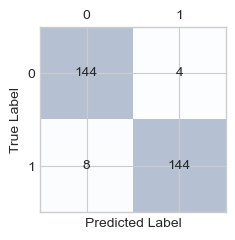

In [183]:
#이해하기 쉽게 시각화

fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

### 3) 정밀도(Precision)와 재현율(Recall)

* 정밀도 = TP / (FP + TP)
* 재현율 = TP / (FN + TP)

* 정확도 = (TN + TP) / (TN + FP + FN + TP)
* 오류율 = (FN + FP) / (TN + FP + FN + TP) or 1 - 정확도

In [187]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print(f'정밀도 : {precision}')
print(f'재현율 : {recall}')

정밀도 : 0.972972972972973
재현율 : 0.9473684210526315


### 4) F1 Score(F-measure)

* 정밀도와 재현율을 결합한 지표
* 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐

\begin{equation}
F1 = 2 \times \frac{precision \times recall}{precision + recall}
\end{equation}


In [188]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)

print(f'F1 Score : {f1}')

F1 Score : 0.9599999999999999


### 5) ROC 곡선과 AUC

* ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
  + TPR(True Positive Rate): TP / (FN + TP), 재현율
  + TNR(True Negative Rate): TN / (FP + TN)
  + FPR(False Positive Rate): FP / (FP + TN), 1 - TNR

* AUC(Area Under Curve) 값은 ROC 곡선 밑에 면적을 구한 값 (1이 가까울수록 좋은 값)

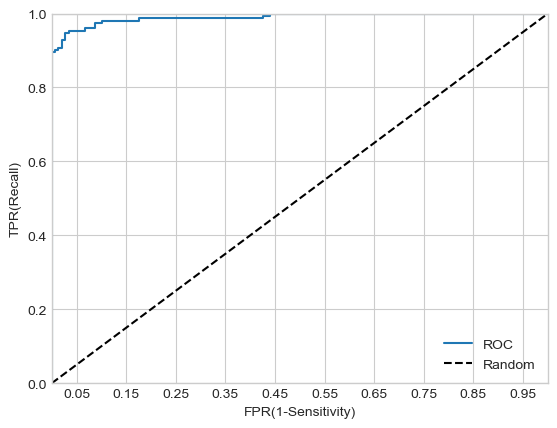

In [191]:
from sklearn.metrics import roc_curve

pred_proba_class1 = model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], '--k', label='Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('FPR(1-Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.legend();


In [192]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, predict)

print("ROC AUC Score: {}".format(roc_auc))

ROC AUC Score: 0.9601706970128022
